In [244]:
import numpy as np
import pandas as pd

from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot

In [245]:
#pip install PyPortfolioOpt

In [246]:
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [247]:
df = pd.read_csv("dt_2001_clean.csv", parse_dates=True, index_col="Date")

In [248]:
df

,BCOMTR,LBUSTRUU,LC07TRUU,LD01TRUU,LG30TRUU,LMBITR,LT01TRUU,LUICTRUU,LULCTRUU,M1CXBRU,...,S5ENRS,S5FINL,S5HLTH,S5INDU,S5INFT,S5MATR,S5TELS,S5UTIL,SPX,SPXT
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,179.9320,938.84,237.3865,843.80,311.1466,532.6040,167.09,1143.67,1169.96,532.60,...,245.14,386.05,434.87,270.83,444.92,128.66,199.72,208.30,1283.27,1785.86
2001-01-03,180.0490,933.62,236.1805,842.59,311.6739,533.3132,166.89,1137.28,1160.99,528.24,...,236.32,405.71,418.89,284.70,522.52,130.16,214.58,197.63,1347.56,1875.56
2001-01-04,182.9210,938.37,237.3955,844.64,313.6097,534.5750,167.39,1143.70,1170.49,533.03,...,230.27,400.85,399.21,284.72,522.95,133.69,221.29,185.10,1333.34,1855.82
2001-01-05,183.8650,943.45,238.6471,847.90,314.7569,536.4280,167.94,1150.60,1182.50,534.27,...,233.17,390.24,397.80,279.87,488.23,130.63,214.33,186.16,1298.35,1807.13
2001-01-08,185.2920,944.95,239.0361,849.18,315.0516,538.1271,168.18,1153.51,1186.26,531.49,...,232.75,388.45,397.48,275.98,489.74,131.17,212.64,188.94,1295.86,1804.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,146.1777,2388.03,632.9947,1715.32,1404.4290,1315.5250,278.65,3069.55,5270.12,1228.98,...,284.71,399.58,1233.39,609.26,1880.04,392.23,189.90,302.52,3239.41,6642.89
2020-07-28,146.2388,2391.05,633.6971,1715.78,1402.9070,1316.2970,278.72,3071.86,5276.99,1227.56,...,279.73,398.45,1231.63,605.24,1857.09,383.66,188.15,307.22,3218.44,6599.97
2020-07-29,147.2259,2391.14,633.8867,1716.37,1406.4470,1316.4940,278.79,3074.11,5268.72,1227.67,...,285.70,406.48,1244.95,614.28,1884.94,386.94,189.62,308.56,3258.44,6682.01


In [249]:
#Russell 2000 Total Return
#iShares Russell Mid-Cap ETF
#Bloomberg Commodity Index Total Return
#Bloomberg Barclays US Aggregate Bond Index
#MSCI World ex USA total net return
#Bloomberg Barclays Global High Yield Total Return Index Value Unhedge

In [250]:
# RU20INTR, RUMCINTR, BCOMTR, LBUSTRUU, NDDUWXUS,LG30TRUU
# use the above indexes to build the portfolio
dt = pd.DataFrame(df[['RU20INTR', 'RUMCINTR', 'BCOMTR', 'LBUSTRUU', 'NDDUWXUS','LG30TRUU']])
dt

,RU20INTR,RUMCINTR,BCOMTR,LBUSTRUU,NDDUWXUS,LG30TRUU
Date,,,,,,
2001-01-02,1811.882,2992.18,179.9320,938.84,2808.133,311.1466
2001-01-03,1897.688,3097.50,180.0490,933.62,2787.269,311.6739
2001-01-04,1869.608,3044.62,182.9210,938.37,2819.614,313.6097
2001-01-05,1814.574,2968.14,183.8650,943.45,2823.976,314.7569
2001-01-08,1808.782,2959.01,185.2920,944.95,2809.619,315.0516
...,...,...,...,...,...,...
2020-07-27,7566.935,15466.26,146.1777,2388.03,6001.344,1404.4290
2020-07-28,7491.050,15344.85,146.2388,2391.05,5993.795,1402.9070
2020-07-29,7648.413,15637.53,147.2259,2391.14,5996.391,1406.4470


In [251]:
#dt[dt.index.strftime('%Y-%m')=='2001-01']
dt_ = dt['2001':'2005']

In [252]:
dt_

,RU20INTR,RUMCINTR,BCOMTR,LBUSTRUU,NDDUWXUS,LG30TRUU
Date,,,,,,
2001-01-02,1811.882,2992.18,179.932,938.84,2808.133,311.1466
2001-01-03,1897.688,3097.50,180.049,933.62,2787.269,311.6739
2001-01-04,1869.608,3044.62,182.921,938.37,2819.614,313.6097
2001-01-05,1814.574,2968.14,183.865,943.45,2823.976,314.7569
2001-01-08,1808.782,2959.01,185.292,944.95,2809.619,315.0516
...,...,...,...,...,...,...
2005-12-23,2865.611,4742.85,307.708,1237.79,3604.199,512.3527
2005-12-27,2824.449,4699.16,302.579,1240.49,3600.779,513.0514
2005-12-28,2840.864,4716.14,307.357,1238.85,3619.176,513.6672


In [253]:
exp_ret = []
vol = []
sr = []
act_ret =[]
for year in range(2006,2020):
    print(year)
    for m in range(0,12):
        if m < 9:
            dt_ = dt_.append(dt[dt.index.strftime('%Y-%m')==str(year)+'-0'+str(m)])
            df_ = dt[dt.index.strftime('%Y-%m')==str(year)+'-0'+str(m+1)]
        elif m == 9:
            dt_ = dt_.append(dt[dt.index.strftime('%Y-%m')==str(year)+'-0'+str(m)])
            df_ = dt[dt.index.strftime('%Y-%m')==str(year)+'-'+str(m+1)]
        else:
            dt_ = dt_.append(dt[dt.index.strftime('%Y-%m')==str(year)+'-'+str(m)])
            df_ = dt[dt.index.strftime('%Y-%m')==str(year)+'-'+str(m+1)]
        
        #print(dt_)
        #print(df_)
        # Calculate expected returns and sample covariance
        mu = expected_returns.mean_historical_return(dt_)
        S = risk_models.sample_cov(dt_)
        
        # Optimise for maximal Sharpe ratio
        ef = EfficientFrontier(mu, S)
        raw_weights = ef.max_sharpe()
        cleaned_weights = ef.clean_weights()
        
        exp_ret.append(ef.portfolio_performance(verbose=False)[0])
        vol.append(ef.portfolio_performance(verbose=False)[1])
        sr.append(ef.portfolio_performance(verbose=False)[2])
        
        wt = list(cleaned_weights.values())
        ret_data = df_.pct_change()[1:]
        weighted_returns = (wt * ret_data)
        port_ret = pd.DataFrame(weighted_returns.sum(axis=1))
        port_ret.index = port_ret.index.map(lambda x:pd.to_datetime(str(x)))
        rrr = (port_ret.groupby([port_ret.index.year,port_ret.index.month]).sum())[0][0]
        print(rrr)
        act_ret.append(rrr)

2006
0.011863172426314926
0.00383174463085999
0.000682979620839604
0.00922348348210223
-0.002902541667096627
-0.003407288805122621
0.013692196332016243
0.015056273770535838
0.005914546118289607
0.014613135822868599
0.017470145513447447
0.0018577313901453232
2007
0.003747308195042924
0.014106313962701528
0.004886107722364879
0.012258627274168384
0.0015150347236786775
-0.012953897435096019
-0.02181971807888021
0.008607131230763192
0.023977418121728322
0.011265992952476503
-0.009031392556142196
0.002399318482677844
2008
-0.005098163594788156
-0.002255409870278899
-0.002770672505227653
0.023962263209647037
0.002437586119554886
-0.016291603038970592
-0.012613650729975027
0.0005625919447187204
-0.06171394289356884
-0.12710855526323364
-0.001122722693166971
0.039197928443075736
2009
-0.011312626187493633
-0.015034081378626198
0.019219314087557924
0.022035051225899938
0.028499125756203322
0.014433953105924779
0.03139921409152381
0.01505418974863514
0.03207931772307199
0.009580624501221881
0.01

In [254]:
len(act_ret)

168

In [255]:
for m in range(1,7):
    print(m)
    dt_ = dt_.append(dt[dt.index.strftime('%Y-%m')=='2020-0'+str(m)])
    df_ = dt[dt.index.strftime('%Y-%m')=='2020-0'+str(m+1)]

    #print(dt_)
    #print(df_)
    # Calculate expected returns and sample covariance
    mu = expected_returns.mean_historical_return(dt_)
    S = risk_models.sample_cov(dt_)
        
    # Optimise for maximal Sharpe ratio
    ef = EfficientFrontier(mu, S)
    raw_weights = ef.max_sharpe()
    cleaned_weights = ef.clean_weights()
        
    exp_ret.append(ef.portfolio_performance(verbose=False)[0])
    vol.append(ef.portfolio_performance(verbose=False)[1])
    sr.append(ef.portfolio_performance(verbose=False)[2])
        
    wt = list(cleaned_weights.values())
    ret_data = df_.pct_change()[1:]
    weighted_returns = (wt * ret_data)
    port_ret = pd.DataFrame(weighted_returns.sum(axis=1))
    port_ret.index = port_ret.index.map(lambda x:pd.to_datetime(str(x)))
    rrr = (port_ret.groupby([port_ret.index.year,port_ret.index.month]).sum())[0][0]
    act_ret.append(rrr)

1
2
3
4
5
6


In [256]:
len(act_ret)

174

In [257]:
# convert to annual return
act_ret_ann = []
for i in range(0,174):
    act_ret_ann.append((1+act_ret[i])**12-1)

In [258]:
len(act_ret_ann)

174

In [259]:
data = {'Expected Return':  exp_ret,
        'Actual Return': act_ret_ann,
         'Annual  Volatility':vol,
        'Sharpe Ratio':sr
       }

dfff = pd.DataFrame(data, columns = ['Expected Return','Actual Return','Annual  Volatility','Sharpe Ratio'])
dfff.to_csv('result.csv',index=False)

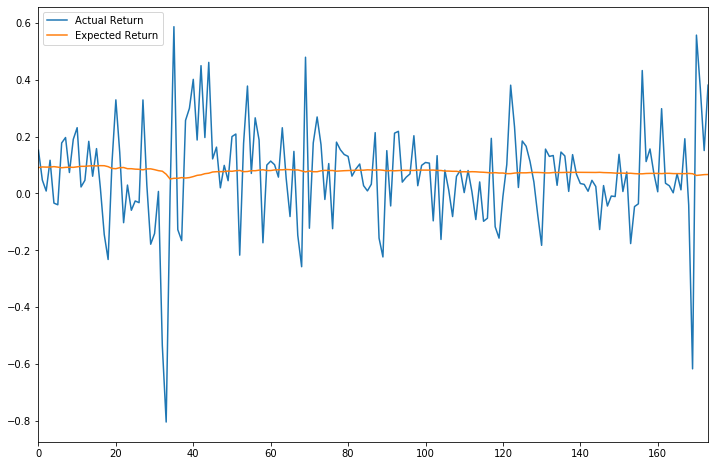

In [260]:
# error
# use some regression models instead of pyportfolio(max SR)
dfff[['Actual Return','Expected Return']].plot(figsize=(12,8))

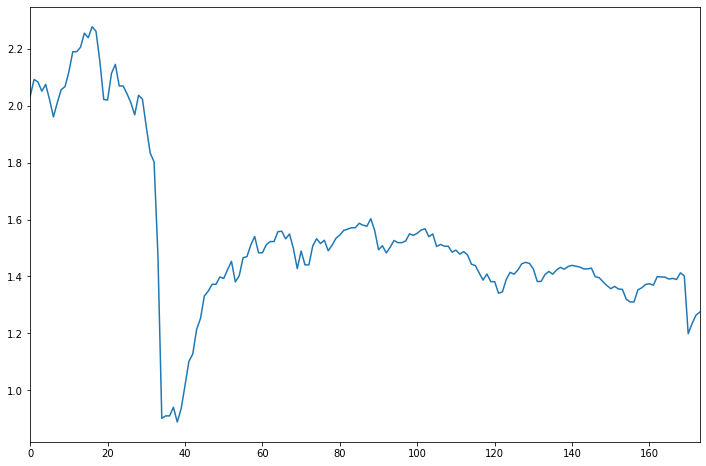

In [261]:
dfff['Sharpe Ratio'].plot(figsize=(12,8))

In [262]:
dfff['Actual Return']

0      0.152024
1      0.046962
2      0.008227
3      0.116473
4     -0.034280
         ...   
169   -0.617205
170    0.556635
171    0.369490
172    0.150617
173    0.380582
Name: Actual Return, Length: 174, dtype: float64

In [263]:
from sklearn.metrics import mean_absolute_error

In [264]:
mean_absolute_error(dfff['Actual Return'], dfff['Expected Return'])

0.1285095670451953

In [265]:
# Interval: year

In [279]:
dt_yr = dt['2001':'2005']

In [280]:
exp_ret_yr = []
vol_yr = []
sr_yr = []
act_ret_yr =[]
for year in range(2006,2020):
    dt_yr = dt_yr.append(dt[dt.index.strftime('%Y')==str(year)])
    df_yr = dt[dt.index.strftime('%Y')==str(year+1)]
    #print(dt_)
    #print(df_yr)
    
    # Calculate expected returns and sample covariance
    mu = expected_returns.mean_historical_return(dt_yr)
    S = risk_models.sample_cov(dt_yr)
    
    # Optimise for maximal Sharpe ratio
    ef = EfficientFrontier(mu, S)
    raw_weights = ef.max_sharpe()
    cleaned_weights = ef.clean_weights()
    
    exp_ret_yr.append(ef.portfolio_performance(verbose=False)[0])
    vol_yr.append(ef.portfolio_performance(verbose=False)[1])
    sr_yr.append(ef.portfolio_performance(verbose=False)[2])
    
    wt = list(cleaned_weights.values())
    ret_data = df_yr.pct_change()[1:]
    weighted_returns = (wt * ret_data)
    port_ret = pd.DataFrame(weighted_returns.sum(axis=1))
    port_ret.index = port_ret.index.map(lambda x:pd.to_datetime(str(x)))
    rrr_yr = (port_ret.groupby([port_ret.index.year,port_ret.index.month]).sum())[0][0]
    print(rrr_yr)
    act_ret_yr.append(rrr_yr)

0.0036663063119428026
-0.005262656541957908
-0.005218465344813212
0.00863857837432916
0.009980332560660722
0.02108261686783992
0.0028813861545970284
0.0047979557930664905
0.0038059953964732027
-0.0018264834265954628
0.01099538413842488
0.0027310299137921334
0.031123567132494718
0.007303603025896173


In [281]:
len(act_ret_yr)

14

In [282]:
# convert to annual return
act_ret_ann_yr = []
for i in range(0,14):
    act_ret_ann_yr.append((1+act_ret_yr[i])**12-1)

In [283]:
data_yr = {'Expected Return':  exp_ret_yr,
        'Actual Return': act_ret_ann_yr,
         'Annual  Volatility':vol_yr,
        'Sharpe Ratio':sr_yr
       }

dfff_yr = pd.DataFrame(data_yr, columns = ['Expected Return','Actual Return','Annual  Volatility','Sharpe Ratio'])
dfff_yr.to_csv('result_yr.csv',index=False)

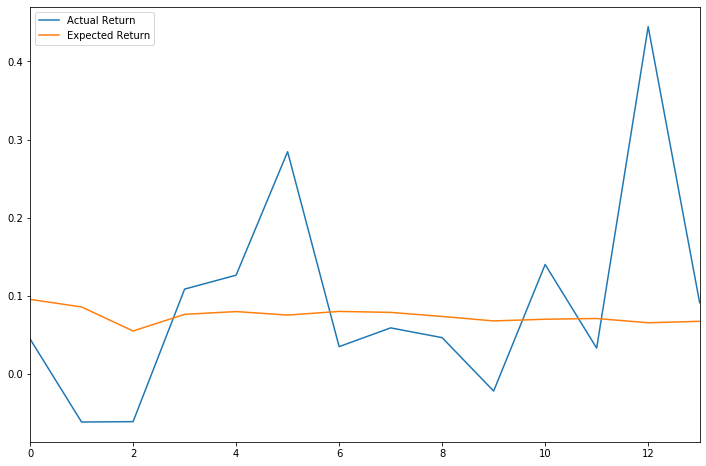

In [284]:
dfff_yr[['Actual Return','Expected Return']].plot(figsize=(12,8))

In [285]:
mean_absolute_error(dfff_yr['Actual Return'], dfff_yr['Expected Return'])

0.0924239244175709

In [288]:
# Monte Carlo Simulation
# arithmetic mean daily return
dt.pct_change(1).mean()

RU20INTR    0.000414
RUMCINTR    0.000429
BCOMTR      0.000011
LBUSTRUU    0.000195
NDDUWXUS    0.000215
LG30TRUU    0.000316
dtype: float64

In [289]:
# arithmetic daily return
dt.pct_change(1).head()

,RU20INTR,RUMCINTR,BCOMTR,LBUSTRUU,NDDUWXUS,LG30TRUU
Date,,,,,,
2001-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,0.047357,0.035198,0.000650,-0.005560,-0.007430,0.001695
2001-01-04,-0.014797,-0.017072,0.015951,0.005088,0.011605,0.006211
2001-01-05,-0.029436,-0.025120,0.005161,0.005414,0.001547,0.003658
2001-01-08,-0.003192,-0.003076,0.007761,0.001590,-0.005084,0.000936


In [291]:
# log daily return
log_return = np.log(dt/dt.shift(1))
log_return.head(5)

,RU20INTR,RUMCINTR,BCOMTR,LBUSTRUU,NDDUWXUS,LG30TRUU
Date,,,,,,
2001-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,0.046270,0.034593,0.000650,-0.005576,-0.007458,0.001693
2001-01-04,-0.014908,-0.017219,0.015825,0.005075,0.011538,0.006192
2001-01-05,-0.029878,-0.025441,0.005147,0.005399,0.001546,0.003651
2001-01-08,-0.003197,-0.003081,0.007731,0.001589,-0.005097,0.000936


In [292]:
print(dt.columns)

weights_MC = np.array(np.random.random(6))
print('Random Weights:')
print(weights_MC)

Index(['RU20INTR', 'RUMCINTR', 'BCOMTR', 'LBUSTRUU', 'NDDUWXUS', 'LG30TRUU'], dtype='object')
Random Weights:
[0.5379735  0.20427554 0.51191645 0.26509853 0.98515234 0.69860372]


In [293]:
print('Rebalance')
weights_MC = weights_MC/np.sum(weights_MC)
print(weights_MC)

Rebalance
[0.1679582  0.06377592 0.15982305 0.08276518 0.30756983 0.21810782]


In [294]:
# expected return
print('Expected Portfolio Return')
exp_ret_MC = np.sum((log_return.mean()*weights_MC)*252)
print(exp_ret_MC)

# expected volatility
print('Expected Volatility')
exp_vol_MC = np.sqrt(np.dot(weights_MC.T,np.dot(log_return.cov()*252, weights_MC)))
print(exp_vol_MC)

# Sharpe Ratio
print('Sharpe Ratio')
SR_MC = exp_ret_MC/exp_vol_MC
print(SR_MC)

Expected Portfolio Return
0.04886439261425515
Expected Volatility
0.11659168322497793
Sharpe Ratio
0.41910701743592915


In [198]:
# ARMA choose weights
dt_ = dt['2001':'2005']

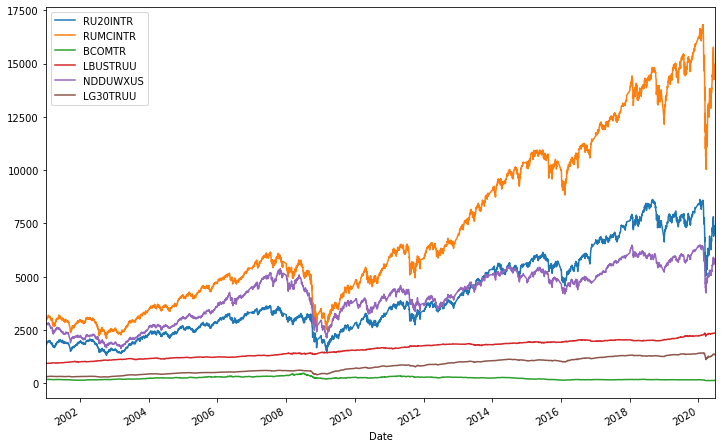

In [287]:
dt_.plot(figsize=(12,8))

/Users/mushroomxg/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mushroomxg/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """


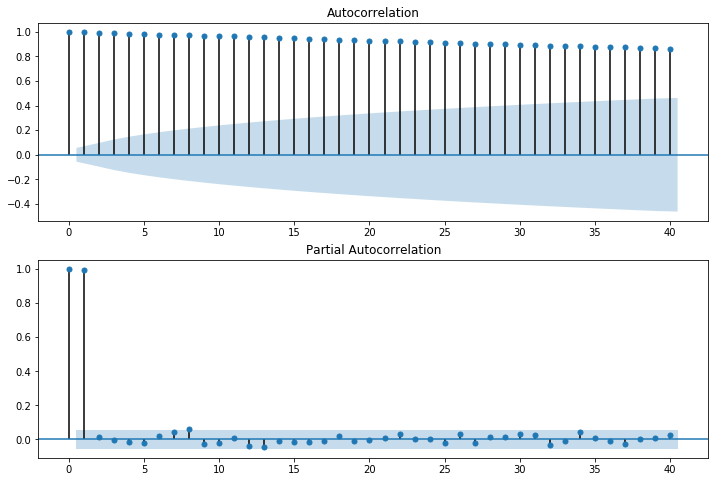

In [207]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dt_.ix[:,0].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dt_.ix[:,0], lags=40, ax=ax2)

/Users/mushroomxg/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mushroomxg/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """


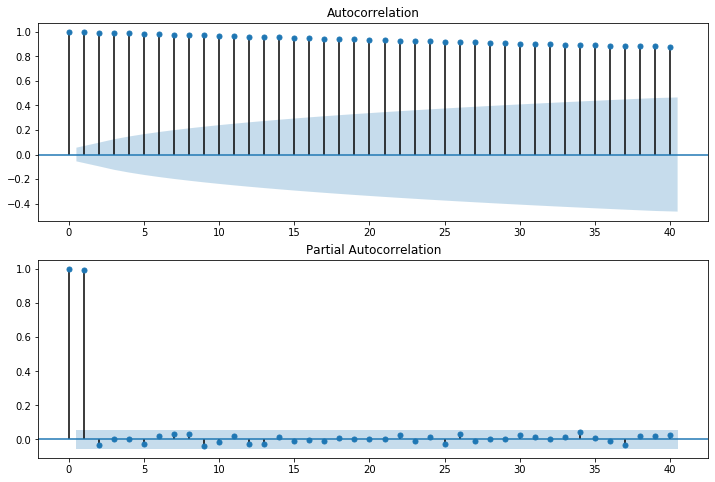

In [209]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dt_.ix[:,1].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dt_.ix[:,1], lags=40, ax=ax2)

/Users/mushroomxg/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mushroomxg/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """


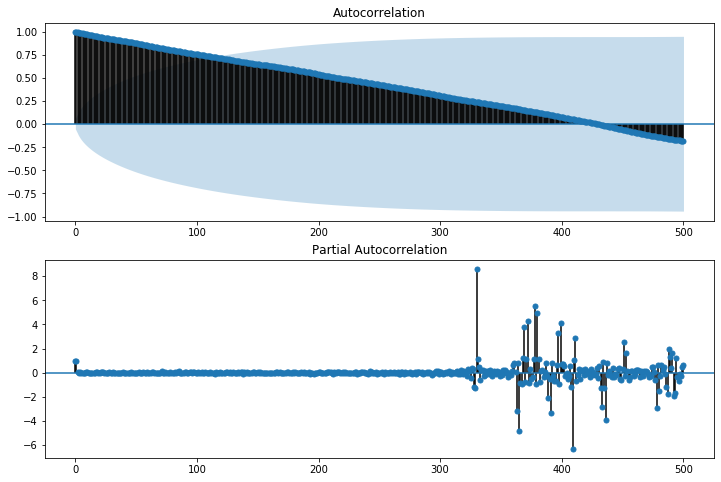

In [215]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dt_.ix[:,2].values.squeeze(), lags=500, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dt_.ix[:,2], lags=500, ax=ax2)